# Brazilian Clinic Data

## Table of contents
> - Introduction <br>
> - Know your data <br>
> - Data cleaning <br>
> - Data visualization <br>
> - Summary and conclusion <br>

### Section 1: Introduction
> A Brazilian clinic had noticed the increasing rates of patients skipping their appointments, Which started to be odder to them especially when they remind them before their dates via SMS. They gathered this data from their patients in order to find the solution for this problem.

### Section2: Know Your Data 
> This Dataset contains 110527 Patient information and 14 parameters.<br>
> <b>PatientId:</b> The special ID for each patient.<br>
> <b>AppointmentID:</b> The special ID for each Appointment.<br>
> <b>Gender:</b> The gender of the patients.<br>
> <b>ScheduledDay:</b> Day of when the patient scheduled his appointment.<br>
> <b>AppointmentDay:</b> Day of the appointment.<br>
> <b>Age:</b> Age of the patients.<br>
> <b>Neighbourhood:</b> Neighbourhood of the patients.<br>
> <b>Scholarship:</b> Whether patients have scholarship or not.<br>
> <b>Hipertension:</b> Whether patients have Hipertension or not.<br>
> <b>Diabetes:</b> Whether patients have Diabetes or not.<br>
> <b>Alcoholism:</b> Whether patients have Alcoholism or not.<br>
> <b>Handcap:</b> Whether patients have Handcap or not.<br>
> <b>SMS_received:</b> Whether patients have recieved their SMS or not.<br>
> <b>No-show:</b> Whether patients have showed for their appointment or not.<br>

In [1]:
# Import Important libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,date, timedelta
%matplotlib inline

In [2]:
#read our csv data file
df=pd.read_csv(r"C:\Users\suntrust\Desktop\projects\brazilian hospital\noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### SECTION 2.A: Understanding the data
> ##### After importing our data set and needed libraries, This section will be for knowing our data and what we are dealing with

In [3]:
#shape of our dataframe
df.shape

(110527, 14)

In [4]:
#Summary of our columns (types, number non-null values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Notes: 
- AppointmentDay and AppointmentDay Should be data/time type

In [5]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [6]:
#Check for dulpicated rows
df.duplicated().sum()

0

In [7]:
#Checking for null values
"""""
Although it appears that there are 110522 non null values which is the number of our rows but this step is essential in
other dataframes
"""""
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

### SECTION 2.B: Checking Columns basic numeric information 
> There is no useful columns to this section except age

In [8]:
df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

Note:<br>-Minimum age is **negative** 

## SECTION 3: Clean the data
#### After we marked our notes now we have to try to solve them

In [9]:
#changing the type of ScheduledDay and AppointmentDay
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'].dtypes,df['AppointmentDay'].dtypes

(datetime64[ns, UTC], datetime64[ns, UTC])

In [10]:
#renaming our dashed name column to be more flexible and readable 
df=df.rename(columns={"No-show":"skipped"})

In [11]:
#removing rows with age <=0
df_filter2=df[df['Age']<=0].index
df.drop(df_filter2,inplace=True)

In [12]:
#checking that always appointment date is after we sechduled it
df[df["AppointmentDay"].dt.date<df['ScheduledDay'].dt.date]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,skipped
27033,7.839273e+12,5679978,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,Yes
55226,7.896294e+12,5715660,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes
64175,2.425226e+13,5664962,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes
71533,9.982316e+14,5686628,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
72362,3.787482e+12,5655637,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,Yes


<b>Note:</b>
> It appears that there are 6 appointments which are supposed to be held before the sechdule time<br>


Note: appoitment day doesn't have time

In [13]:
#remove this rows by their indexes
df_filter=df[df["AppointmentDay"].dt.date<df['ScheduledDay'].dt.date].index
df.drop(df_filter,inplace=True)
df[df["AppointmentDay"].dt.date<df['ScheduledDay'].dt.date]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,skipped


In [14]:
#remove PatientId and AppointmentID since we won't need them
df.drop(columns=['PatientId','AppointmentID'], inplace=True)

### SECTION 4:Visualize the dataframe

> After we cleaned our dataframe we need to start to visualize the relations between different parameters to see if there any significant impact on why patients does not show up

### Section 4.A: Creating repeated functions
This section is made after the some visualization and i noticed that some of this visuals are frequent used in this dataset 
because all of parameters except age is categorical data so there was no that diversity in visulaization.

In [15]:
# Creating bar chart that visualize the actual numbers in bar chart form
#This function takes dataframe column, name to put on the graph and return nothing
def barchart_no_normalize(col_name,name,spacing=5):
    parameter_vs_showing=pd.crosstab(col_name,df["skipped"])
    ax = parameter_vs_showing.plot.bar(figsize=(10,5))
    plt.title("{} VS Show/Didn't show".format(name))
    ax.set_ylabel('Numbers')
    rects = ax.patches
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 
                height, 
                str(height), 
                ha='center', 
                va='bottom',
                fontsize = 12)

In [16]:
# Creating bar chart that visualize the percentage in bar chart form
#This function takes dataframe column, name to put on the graph and return nothing
def barchart(col_name,name,spacing=5):
    parameter_vs_showing=pd.crosstab(col_name,df["skipped"],normalize=True)
    parameter_vs_showing=round(parameter_vs_showing*100,2)
    ax = parameter_vs_showing.plot.bar(figsize=(10,5),)
    plt.title("{} VS Show/Didn't show".format(name))
    ax.set_ylabel('proportion')
    rects = ax.patches
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 
                height, 
                str(height)+'%', 
                ha='center', 
                va='bottom',
                fontsize = 12)


### SECTION 4.B: Glimpse of the whole dataset at once
Before putting any assumption we can plot the whole data set trying to notice any correlation between two parameters or more

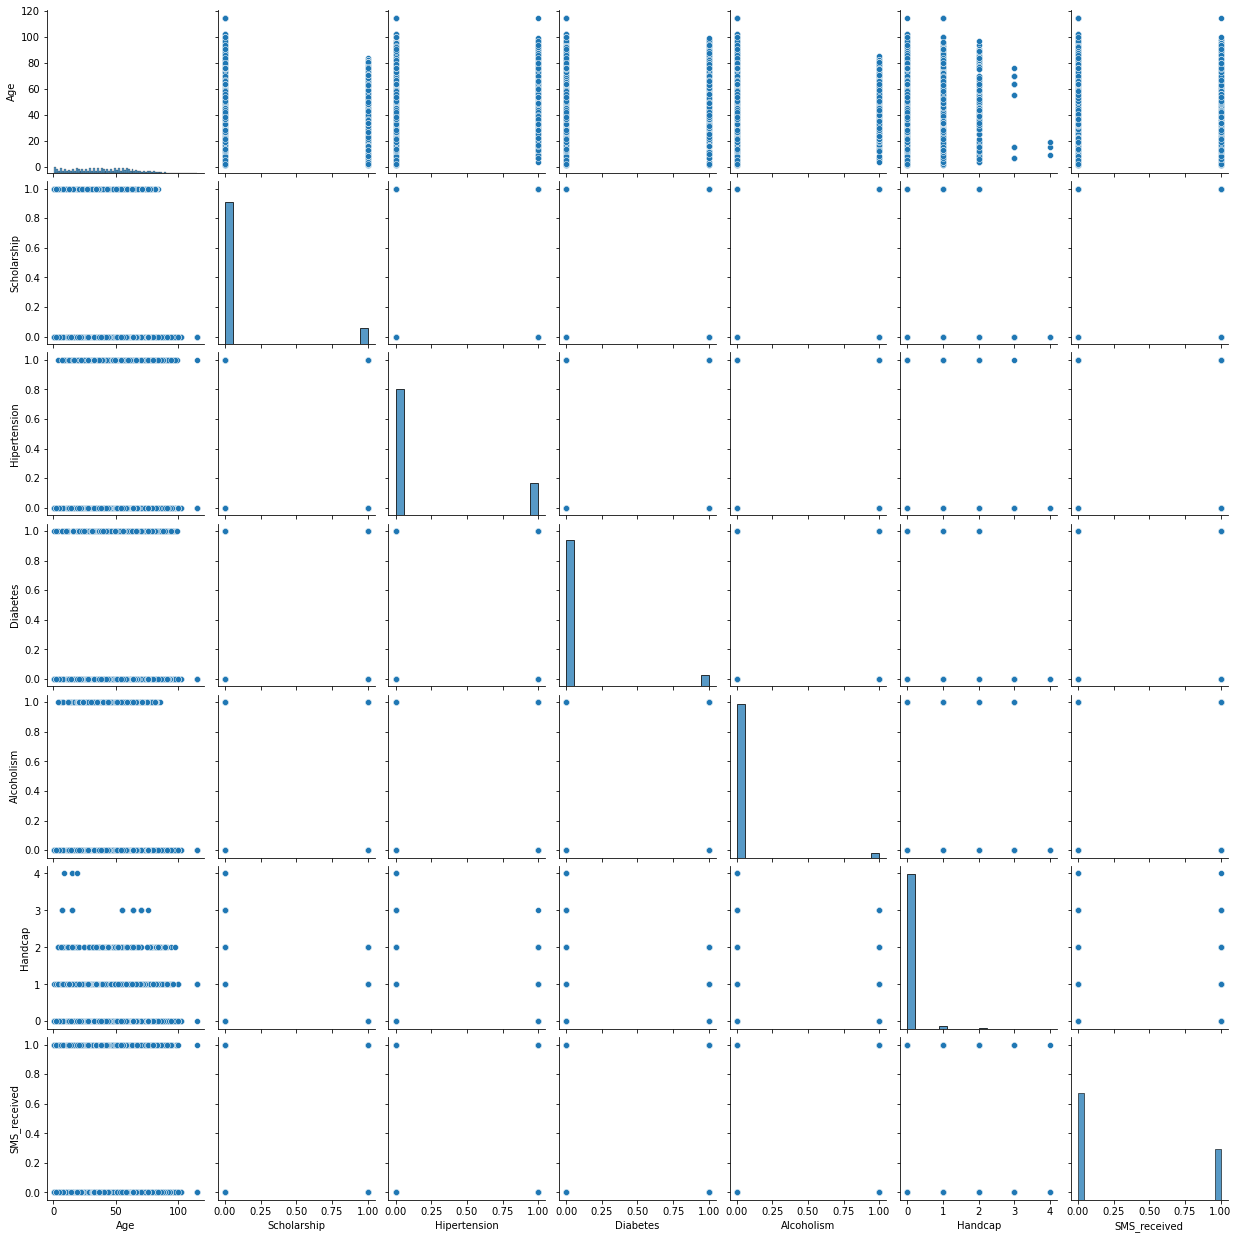

In [17]:
#Visualize the whole dataset to find any sort of relations between different parameters
sns.pairplot(df);

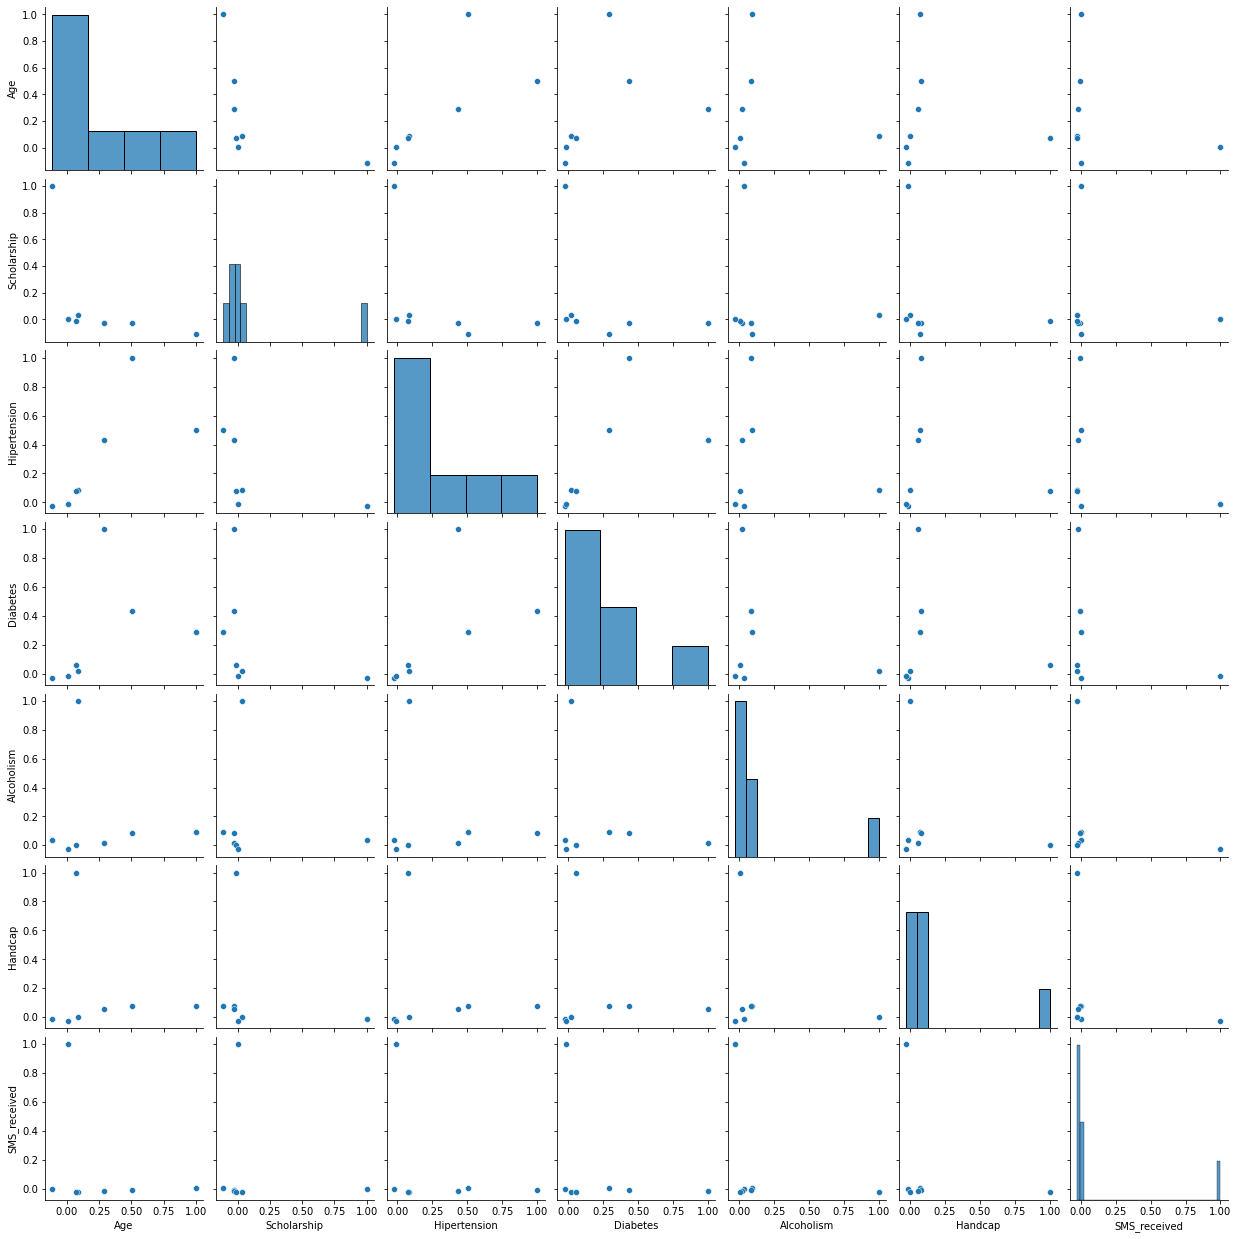

In [18]:
#Visualize the whole dataset to find correlation or any sort of relations between different parameters
sns.pairplot(df.corr());

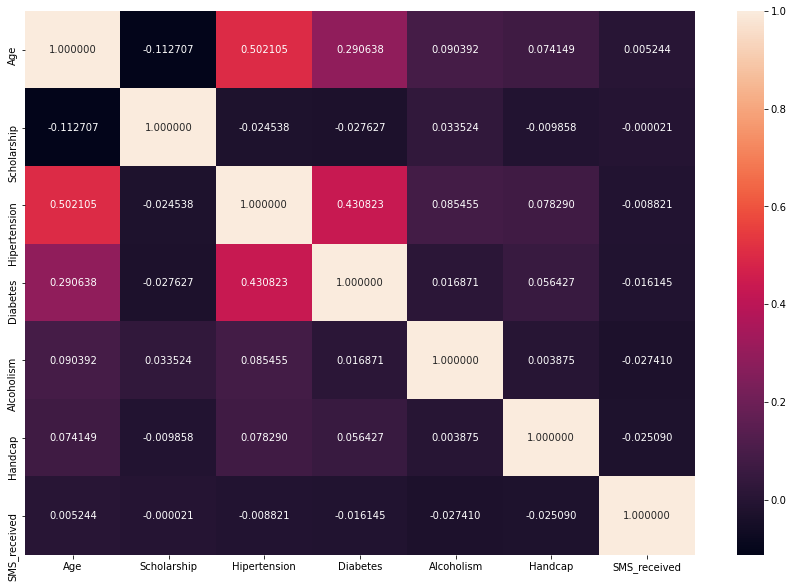

In [19]:
#correlation in a more descriptive form
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), ax=ax, annot=True,fmt="f");

It appears that there all relations considered weak or very weak **except** relation between age and hipertension is **moderate**

### SECTION 4.C: Dive Into data

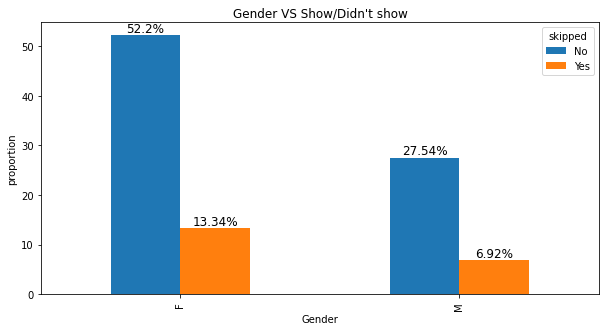

In [20]:
#Bar chart for gender vs showing
#Make with crosstab to put this categorical data in numeric table which shows the relation between them
gender_vs_showing=pd.crosstab(df["Gender"],df["skipped"],normalize=True)
#to make numbers in percent
gender_vs_showing=round(gender_vs_showing*100,2)
#create figure size
ax = gender_vs_showing.plot.bar(figsize=(10,5));
#make title
plt.title("Gender VS Show/Didn't show")
#y-axis label
ax.set_ylabel('proportion')

#add labels
rects = ax.patches
for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 
                height, 
                str(height)+'%', 
                ha='center', 
                va='bottom',
                fontsize = 12)

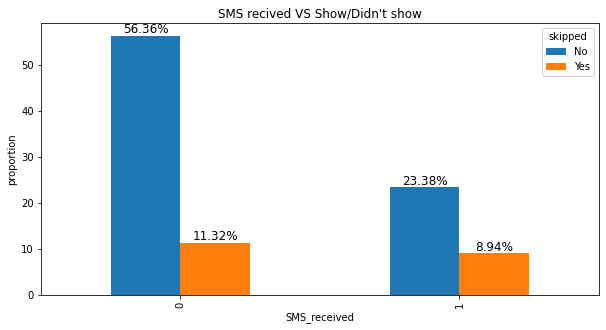

In [21]:
sms_vs_showing=pd.crosstab(df["SMS_received"],df["skipped"],normalize=True)
sms_vs_showing=round(sms_vs_showing*100,2)
ax = sms_vs_showing.plot.bar(figsize=(10,5));
plt.title("SMS recived VS Show/Didn't show")
ax.set_ylabel('proportion')
rects = ax.patches
for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 
                height, 
                str(height)+'%', 
                ha='center', 
                va='bottom',
                fontsize = 12)

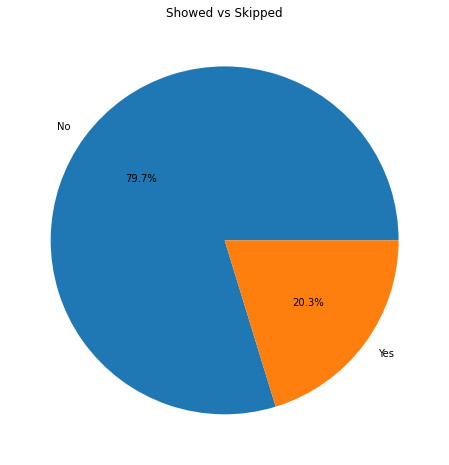

No     85307
Yes    21675
Name: skipped, dtype: int64


In [22]:
x=df['skipped'].value_counts()
fig = plt.figure(figsize=(8,8))
plt.pie(x,labels=df['skipped'].unique(),autopct='%1.1f%%')
plt.title("Showed vs Skipped")
plt.show()
print(df['skipped'].value_counts())

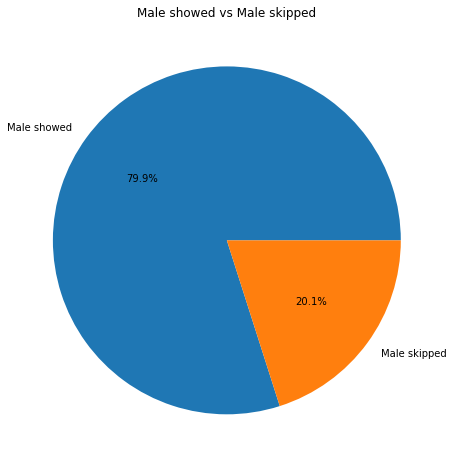

In [23]:
#calculating number of males who skipped and showed
male_show=len(df[(df["Gender"]=='M') & (df["skipped"]=='No')])/len(df[df["Gender"]=='M'])
male_no_show=len(df[(df["Gender"]=='M') & (df["skipped"]=='Yes')])/len(df[df["Gender"]=='M'])
#putting in array form to insert it in pie chart
x=np.array([male_show,male_no_show])
fig = plt.figure(figsize=(8,8))
plt.pie(x,labels=['Male showed','Male skipped'],autopct='%1.1f%%')
plt.title("Male showed vs Male skipped")
plt.show()

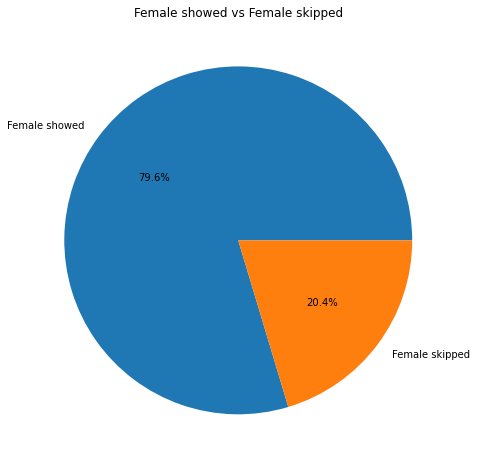

In [24]:
female_show=len(df[(df["Gender"]=='F') & (df["skipped"]=='No')])/len(df[df["Gender"]=='F'])
female_no_show=len(df[(df["Gender"]=='F') & (df["skipped"]=='Yes')])/len(df[df["Gender"]=='F'])
x=np.array([female_show,female_no_show])
fig = plt.figure(figsize=(8,8))
plt.pie(x,labels=['Female showed','Female skipped'],autopct='%1.1f%%')
plt.title("Female showed vs Female skipped")
plt.show()

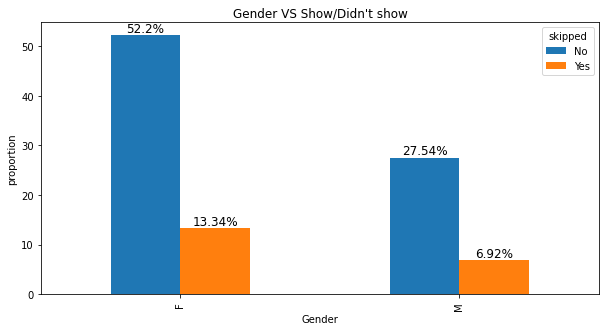

In [25]:
barchart(df['Gender'],"Gender")

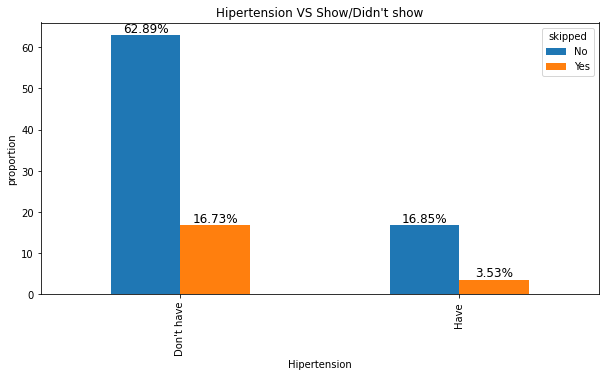

In [26]:
#Changing values of categorical columns to more descriptive labels
df['Hipertension'] = df['Hipertension'].replace(0,"Don't have")
df['Hipertension'] = df['Hipertension'].replace(1,'Have')
barchart(df['Hipertension'],"Hipertension")

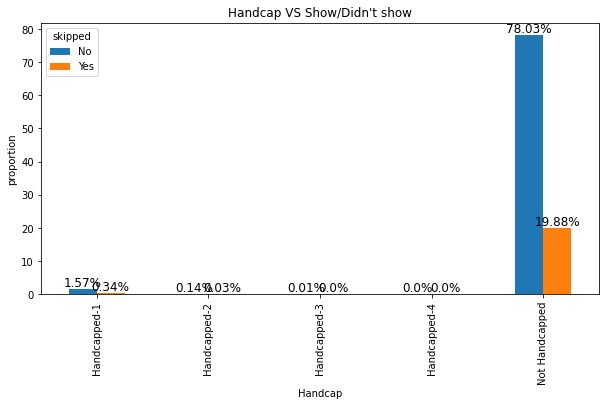

In [27]:
df['Handcap'] = df['Handcap'].replace(0,'Not Handcapped')
df['Handcap'] = df['Handcap'].replace(1,'Handcapped-1')
df['Handcap'] = df['Handcap'].replace(2,'Handcapped-2')
df['Handcap'] = df['Handcap'].replace(3,'Handcapped-3')
df['Handcap'] = df['Handcap'].replace(4,'Handcapped-4')
barchart(df['Handcap'],"Handcap")

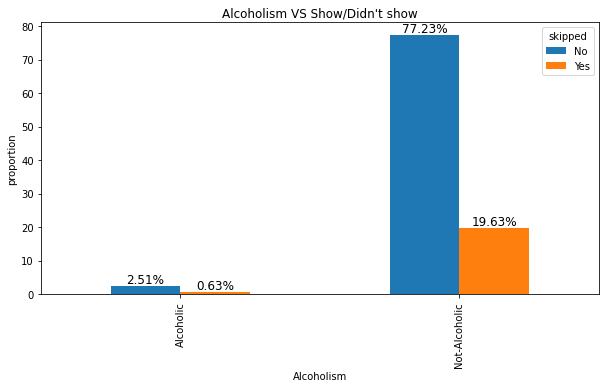

In [28]:
df['Alcoholism'] = df['Alcoholism'].replace(1,'Alcoholic')
df['Alcoholism'] = df['Alcoholism'].replace(0,'Not-Alcoholic')
barchart(df['Alcoholism'],"Alcoholism")

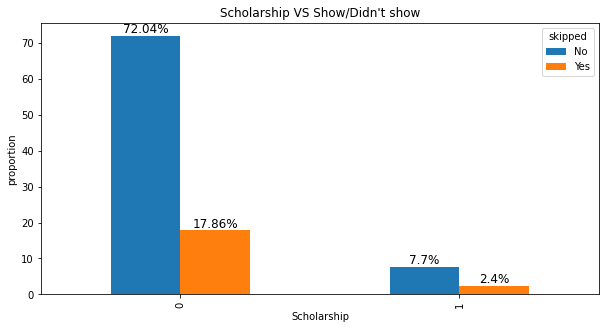

In [29]:
barchart(df['Scholarship'],'Scholarship')

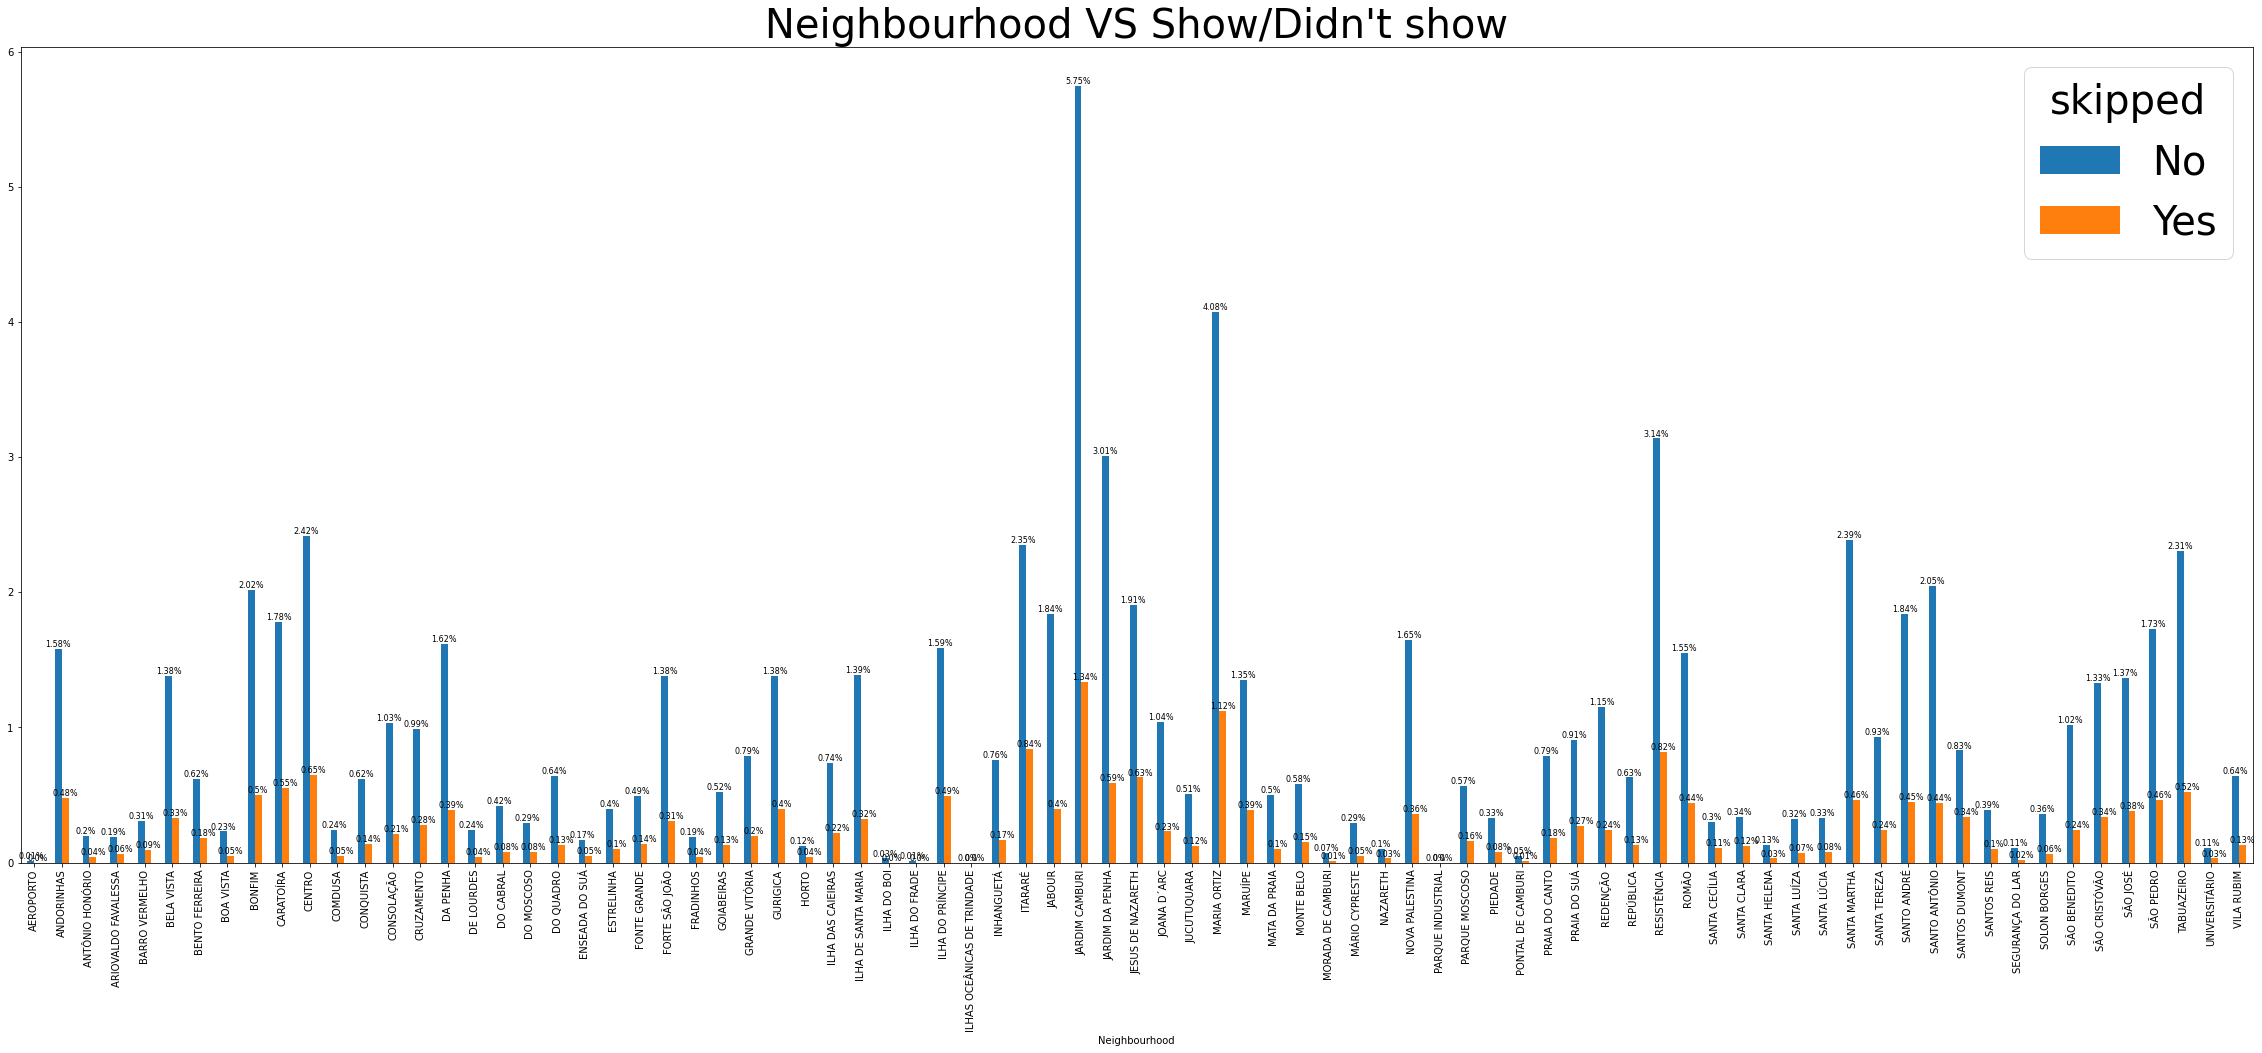

In [30]:
#since i needed to change figure sizes and sized for elements in this graph i didn't use the function i created before
# you tap on figure to zoom in to be more clear
parameter_vs_showing=pd.crosstab(df['Neighbourhood'],df["skipped"],normalize=True)
parameter_vs_showing=round(parameter_vs_showing*100,2)
ax = parameter_vs_showing.plot.bar(figsize=(40,15),)
plt.title("{} VS Show/Didn't show".format('Neighbourhood'),fontsize=40)
plt.legend(title='skipped',fontsize=40,title_fontsize=40)
rects = ax.patches
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, 
            height, 
            str(height)+'%', 
            ha='center', 
            va='bottom',
            fontsize = 8)

> Until now there is no reason appeared for skipping appointments from this visualization having around a range of cancellation
15% to 20% is pretty normal in the medical fields but mostly important even if this range is large for them this visualizations didn't show any dominant parameters that can the most impact on our problem

> Because of age has wide range and it is ineffecient to plot every age we will divide it into sub category to represent each generation

In [31]:
#getting minimum and maximum ages to know our limits
min_age=df['Age'].min()
max_age=df['Age'].max()

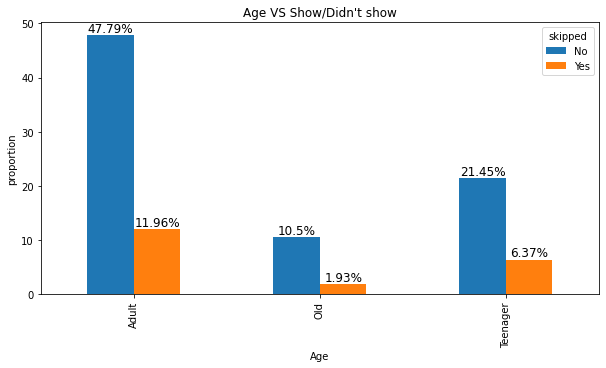

In [32]:
for age in range(min_age,22):
    df['Age'] = df['Age'].replace(age,'Teenager')
for age in range(22,66):
    df['Age'] = df['Age'].replace(age,'Adult')
for age in range(66,max_age+1):
    df['Age'] = df['Age'].replace(age,'Old')
barchart(df['Age'],"Age")

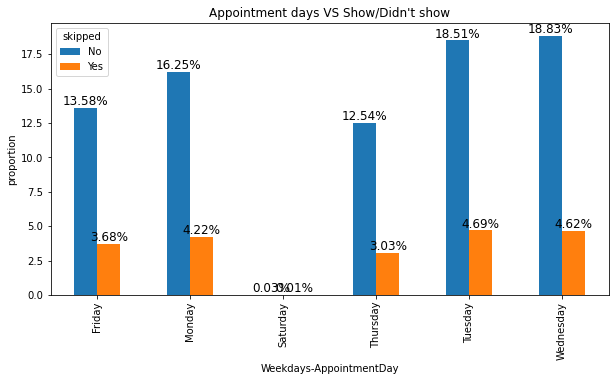

In [33]:
#creating a column holds the weekdays of each appointment to plot it
df['Weekdays-AppointmentDay']=df['AppointmentDay'].dt.strftime('%A')
barchart(df['Weekdays-AppointmentDay'],'Appointment days')

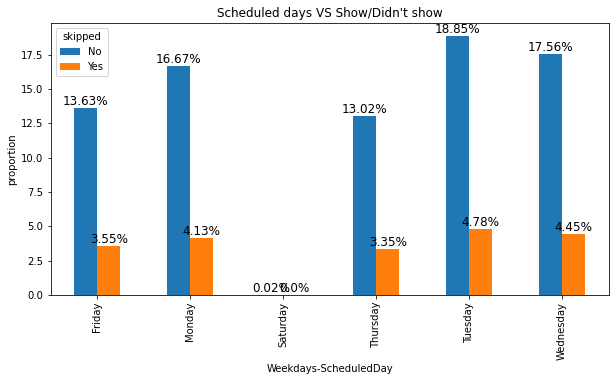

In [34]:
df['Weekdays-ScheduledDay']=df['ScheduledDay'].dt.strftime('%A')
barchart(df['Weekdays-ScheduledDay'],'Scheduled days')

> Still nothing appeared to have that significate impact that make us look deeper

We can have a diiferenet approach and look at the waiting time between Scheduled Day and Appointment Day, But now i will try 
divide waiting time into groups. After some search i found that ranges for clinics waiting can be put on 4 categories; Short, moderate, long and very long

Short        59865
Long         18214
Very Long    14997
Moderate     13906
Name: days_diff, dtype: int64


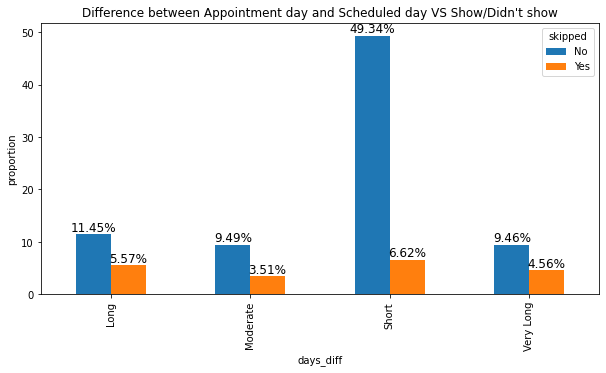

In [35]:
df['days_diff']=(df['AppointmentDay'].dt.date-df['ScheduledDay'].dt.date).dt.days
max_date=(df['AppointmentDay'].dt.date-df['ScheduledDay'].dt.date).max().days
for days_diff in range(0,6):
    df['days_diff'] = df['days_diff'].replace(days_diff,'Short')
for days_diff in range(6,11):
    df['days_diff'] = df['days_diff'].replace(days_diff,'Moderate')
for days_diff in range(11,26):
    df['days_diff'] = df['days_diff'].replace(days_diff,'Long')
for days_diff in range(26,1+max_date):
    df['days_diff'] = df['days_diff'].replace(days_diff,'Very Long')
barchart(df['days_diff'],'Difference between Appointment day and Scheduled day')
print(df['days_diff'].value_counts());

We can notice now that periods longer than short has almost <b>50% chance to be skipped</b>

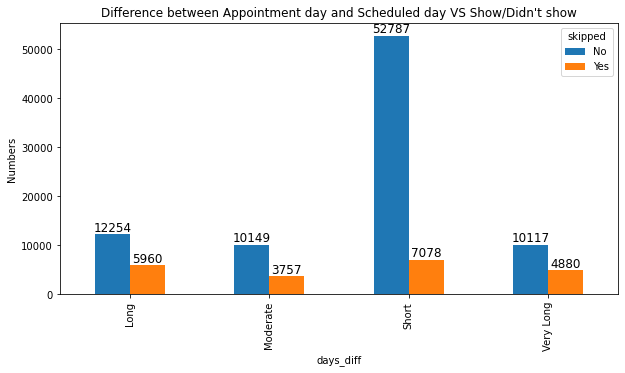

In [36]:
barchart_no_normalize(df['days_diff'],'Difference between Appointment day and Scheduled day')

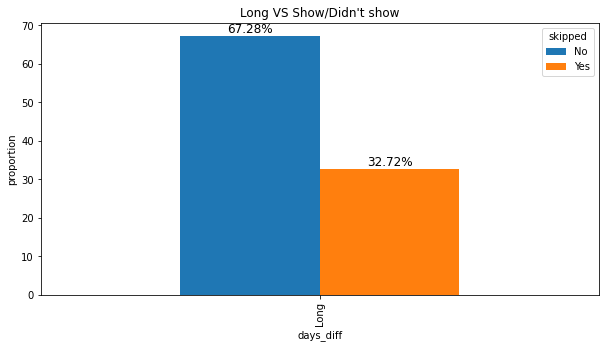

In [37]:
parameter_vs_showing=pd.crosstab(df[df['days_diff']=='Long']['days_diff'],df[df['days_diff']=='Long']["skipped"],normalize=True)
parameter_vs_showing=round(parameter_vs_showing*100,2)
ax = parameter_vs_showing.plot.bar(figsize=(10,5),)
plt.title("{} VS Show/Didn't show".format('Long'))
ax.set_ylabel('proportion')
rects = ax.patches
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, 
            height, 
            str(height)+'%', 
            ha='center', 
            va='bottom',
            fontsize = 12)

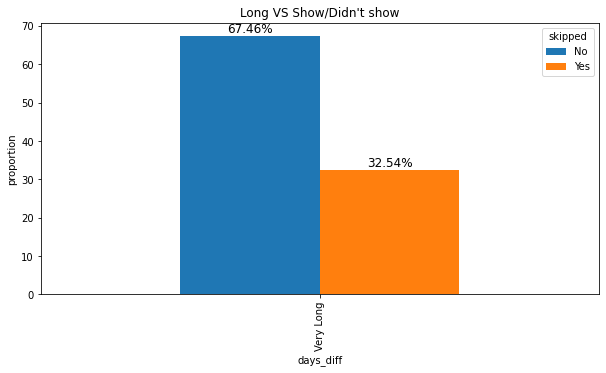

In [38]:
parameter_vs_showing=pd.crosstab(df[df['days_diff']=='Very Long']['days_diff'],df[df['days_diff']=='Very Long']["skipped"],normalize=True)
parameter_vs_showing=round(parameter_vs_showing*100,2)
ax = parameter_vs_showing.plot.bar(figsize=(10,5),)
plt.title("{} VS Show/Didn't show".format('Long'))
ax.set_ylabel('proportion')
rects = ax.patches
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, 
            height, 
            str(height)+'%', 
            ha='center', 
            va='bottom',
            fontsize = 12)

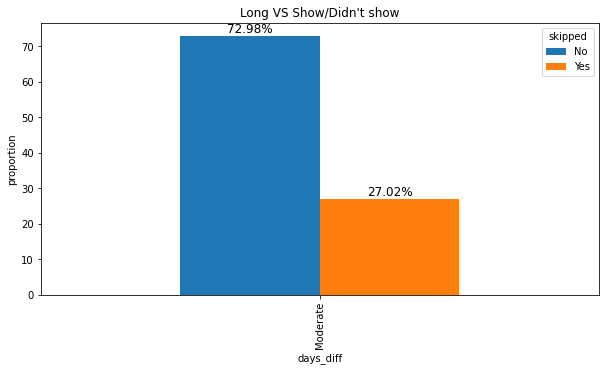

In [39]:
parameter_vs_showing=pd.crosstab(df[df['days_diff']=='Moderate']['days_diff'],df[df['days_diff']=='Moderate']["skipped"],normalize=True)
parameter_vs_showing=round(parameter_vs_showing*100,2)
ax = parameter_vs_showing.plot.bar(figsize=(10,5),)
plt.title("{} VS Show/Didn't show".format('Long'))
ax.set_ylabel('proportion')
rects = ax.patches
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, 
            height, 
            str(height)+'%', 
            ha='center', 
            va='bottom',
            fontsize = 12)

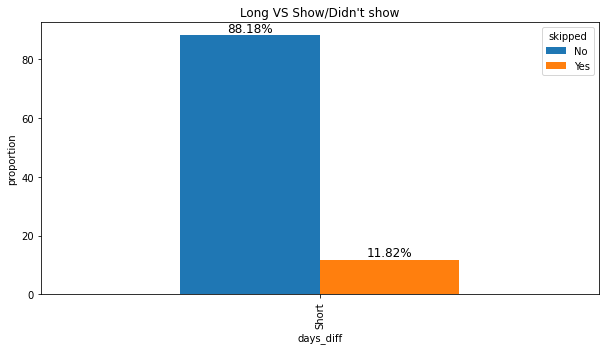

In [40]:
parameter_vs_showing=pd.crosstab(df[df['days_diff']=='Short']['days_diff'],df[df['days_diff']=='Short']["skipped"],normalize=True)
parameter_vs_showing=round(parameter_vs_showing*100,2)
ax = parameter_vs_showing.plot.bar(figsize=(10,5),)
plt.title("{} VS Show/Didn't show".format('Long'))
ax.set_ylabel('proportion')
rects = ax.patches
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, 
            height, 
            str(height)+'%', 
            ha='center', 
            va='bottom',
            fontsize = 12)

It appears that the longer the difference between the scheduled day and appointment day is the higher chance to be skipped

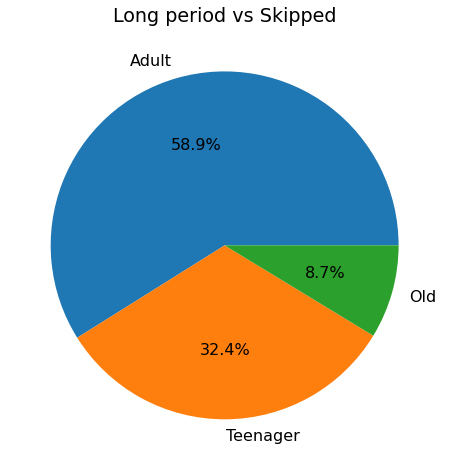

Adult       3511
Teenager    1931
Old          518
Name: Age, dtype: int64


In [41]:
#plt.pie(df[df['days_diff']=='Long']['Age'].value_counts());
x=df[(df['days_diff']=='Long') & (df['skipped']=='Yes')]['Age'].value_counts()
fig = plt.figure(figsize=(8,8))
plt.rcParams['font.size'] = '16'
plt.pie(x,labels=df['Age'].unique(),autopct='%1.1f%%',textprops={'color':"black"})
plt.title("Long period vs Skipped")
plt.show()
print(x)

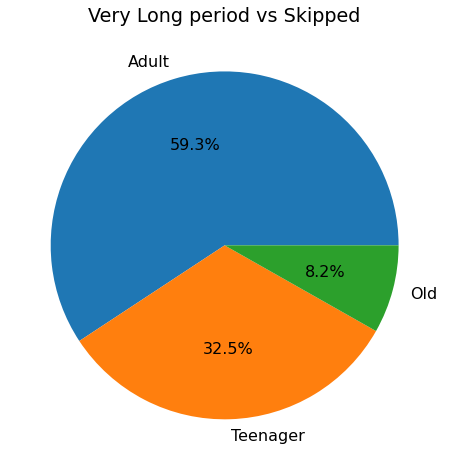

Adult       2892
Teenager    1588
Old          400
Name: Age, dtype: int64


In [42]:
x=df[(df['days_diff']=='Very Long') & (df['skipped']=='Yes')]['Age'].value_counts()
fig = plt.figure(figsize=(8,8))
plt.rcParams['font.size'] = '16'
plt.pie(x,labels=df['Age'].unique(),autopct='%1.1f%%',textprops={'color':"black"})
plt.title("Very Long period vs Skipped")
plt.show()
print(x)

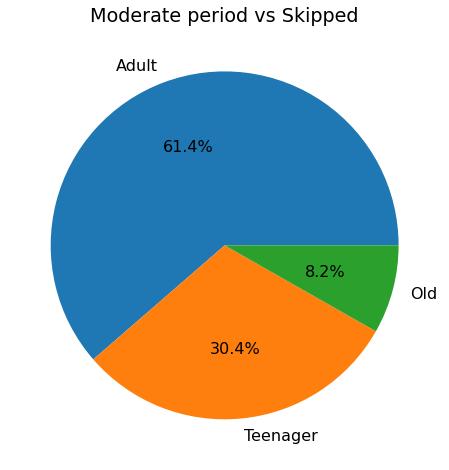

Adult       2306
Teenager    1142
Old          309
Name: Age, dtype: int64


In [43]:
x=df[(df['days_diff']=='Moderate') & (df['skipped']=='Yes')]['Age'].value_counts()
fig = plt.figure(figsize=(8,8))
plt.rcParams['font.size'] = '16'
plt.pie(x,labels=df['Age'].unique(),autopct='%1.1f%%',textprops={'color':"black"})
plt.title("Moderate period vs Skipped")
plt.show()
print(x)

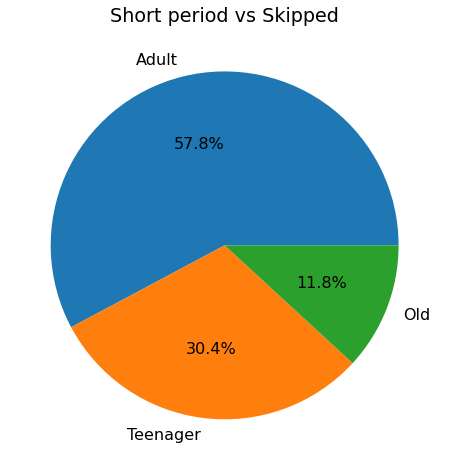

Adult       4091
Teenager    2149
Old          838
Name: Age, dtype: int64


In [44]:
x=df[(df['days_diff']=='Short') & (df['skipped']=='Yes')]['Age'].value_counts()
fig = plt.figure(figsize=(8,8))
plt.rcParams['font.size'] = '16'
plt.pie(x,labels=df['Age'].unique(),autopct='%1.1f%%',textprops={'color':"black"})
plt.title("Short period vs Skipped")
plt.show()
print(x)

### Section 5.A: Summary
> At this point from the dataset we have it shows that there no reason for skipping appointment except days between the schedule day and appointment day but after a small search i found that this long periods between these dates can have a lot of reasons for instance Bone fractures can take 3+ months before re-visit the clinic so we can't decide that this the reason behind not showing up
### Section 5.B: Conculsion
> There is no enough information to make a decisive analysis so we need to collect this additional information:
> - The reason of visit, how often he is treated in this clinic and the reason for the next visit of every patient<br> 
> - More information about the clinic like; Is this clinic has different departments inside or specified in one medical field<br>
> - Information about doctors there and if patients switching between them or leave feedbacks about them

